In [1]:
!python --version

Python 3.8.10


In [2]:
import pandas as pd
import numpy as np

In [4]:
loan_df = pd.read_csv('Loan_Prediction.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
x = loan_df.drop('Loan_Status',axis=1)
y = loan_df['Loan_Status']

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)


In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((460, 12), (154, 12), (460,), (154,))

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_df.isna().sum()/len(loan_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
loan_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [14]:
x_train['Gender'].fillna(x_train['Gender'].mode()[0], inplace = True)

In [15]:
x_train['Gender']

484      Male
470      Male
590      Male
533      Male
339    Female
        ...  
161      Male
180      Male
227      Male
248      Male
390      Male
Name: Gender, Length: 460, dtype: object

In [16]:
x_test['Gender'].fillna(x_test['Gender'].mode()[0], inplace = True)

In [17]:
x_train['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [18]:
x_test['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [19]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace = True)

In [20]:
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace = True)

In [21]:
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace = True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace = True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace = True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace = True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace = True)

### Need to change data types

In [22]:
loan_df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [23]:
loan_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
loan_df['Married'].replace({'Yes':1, 'No':0}, inplace = True)

In [25]:
loan_df['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace = True)

In [26]:
loan_df['Self_Employed'].replace({'Yes':1, 'No':0}, inplace = True)

In [27]:
loan_df['Loan_Status'].replace({'Y':1, 'N':0}, inplace = True)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
loan_df['Dependents'] = le.fit_transform(loan_df['Dependents'])
loan_df['Property_Area'] = le.fit_transform(loan_df['Property_Area'])

In [30]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(2), int64(6), object(1)
memory usage: 57.7+ KB


In [31]:
import seaborn as sns

<AxesSubplot: >

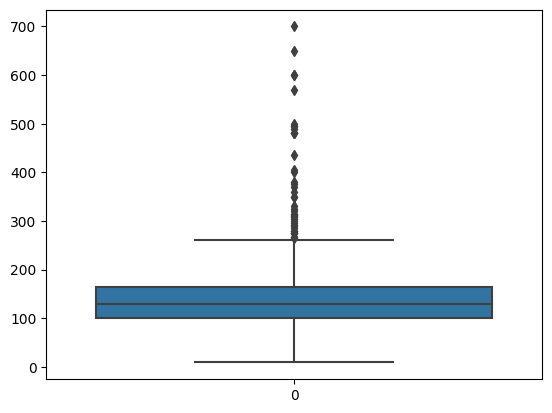

In [32]:
sns.boxplot(loan_df['LoanAmount'])

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot: >

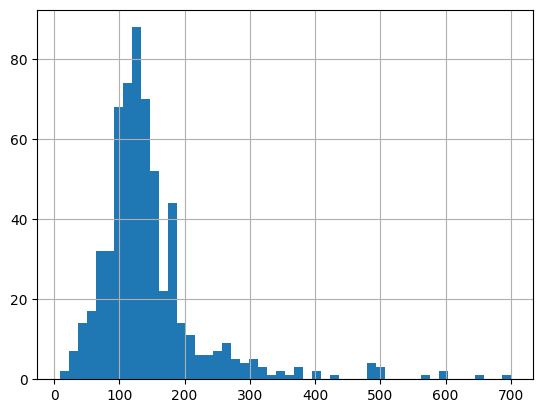

In [34]:
loan_df['LoanAmount'].hist(bins = 50)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

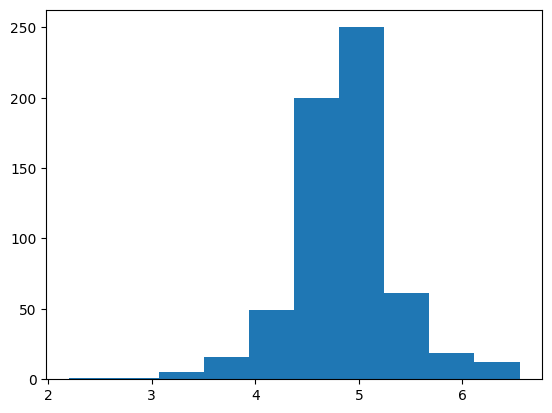

In [35]:
plt.hist(np.log(loan_df['LoanAmount']))

In [36]:
loan_df['log_LoanAmount'] = np.log(loan_df['LoanAmount'])

<AxesSubplot: >

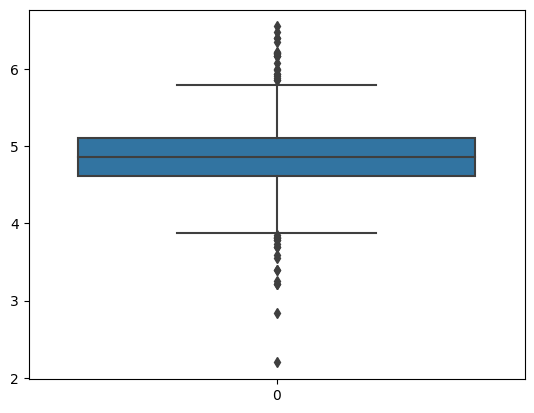

In [37]:
sns.boxplot(loan_df['log_LoanAmount'])

C:\Users\mydel\AppData\Local\Temp\ipykernel_13144\3349737517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['log_LoanAmount'], kde = True)


<AxesSubplot: xlabel='log_LoanAmount', ylabel='Density'>

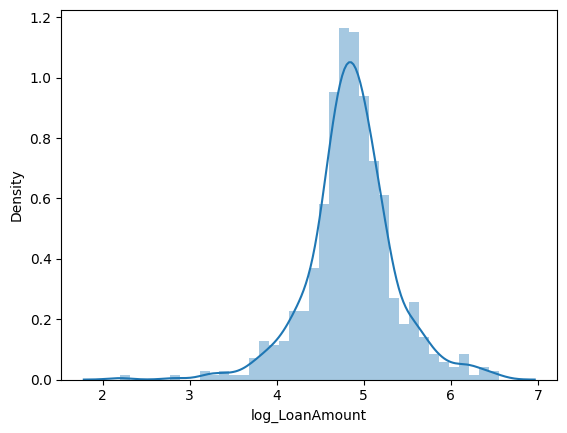

In [38]:
sns.distplot(loan_df['log_LoanAmount'], kde = True)

In [39]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount'],
      dtype='object')

In [40]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

<AxesSubplot: >

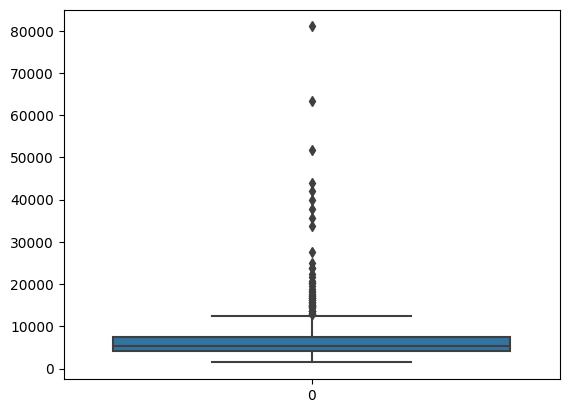

In [41]:
sns.boxplot(loan_df['TotalIncome'])

<AxesSubplot: >

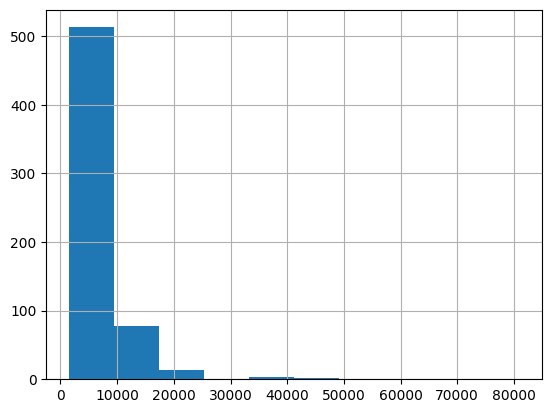

In [42]:
loan_df['TotalIncome'].hist()

In [43]:
loan_df['log_TotalIncome'] = np.log(loan_df['TotalIncome'])

In [44]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,TotalIncome,log_TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


# Feature Selection 

In [45]:
loan_df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'], axis = 1,
            inplace = True)

In [46]:
loan_df = loan_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_LoanAmount', 'log_TotalIncome','Loan_Status']]
loan_df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_TotalIncome,Loan_Status
0,1,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1
1,1,1,1,1,0,360.0,1.0,0,4.852030,8.714568,0
2,1,1,0,1,1,360.0,1.0,2,4.189655,8.006368,1
3,1,1,0,0,0,360.0,1.0,2,4.787492,8.505323,1
4,1,0,0,1,0,360.0,1.0,2,4.948760,8.699515,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,360.0,1.0,0,4.262680,7.972466,1
610,1,1,3,1,0,180.0,1.0,0,3.688879,8.320205,1
611,1,1,1,1,0,360.0,1.0,2,5.533389,9.025456,1
612,1,1,2,1,0,360.0,1.0,2,5.231109,8.933664,1


In [47]:
X = loan_df.drop(columns = ['Loan_Status'])
y = loan_df['Loan_Status']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify=y)

In [49]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_TotalIncome
22,1,1,0,0,0,360.0,0.0,1,4.753590,8.414274
604,0,1,1,1,0,360.0,1.0,1,6.206576,9.392662
181,1,0,0,1,0,360.0,1.0,0,4.204693,8.850661
85,1,0,0,1,0,360.0,1.0,1,4.912655,8.496378
391,1,1,3,1,0,360.0,1.0,0,5.616771,9.159468


# Logestic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_test = logreg.predict(X_test)

##### Evaluation Testing 

acc = accuracy_score(y_test,y_pred_test)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

##### Evaluation Training 
print("################# Training ################")
y_pred_train = logreg.predict(X_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))


Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123

[[18 20]
 [ 0 85]]
################# Training ################
Accuracy Score = 0.8024439918533605
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491

[[ 64  90]
 [  7 330]]


C:\Users\mydel\anaconda3\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree 

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

y_pred_test_tree = tree_clf.predict(X_test)

##### Evaluation Testing 

acc = accuracy_score(y_test,y_pred_test_tree)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_test_tree))
print(confusion_matrix(y_test,y_pred_test_tree))

##### Evaluation Training 
print("################# Training ################")
y_pred_train = tree_clf.predict(X_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))


Accuracy Score = 0.7398373983739838
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        38
           1       0.81      0.81      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123

[[22 16]
 [16 69]]
################# Training ################
Accuracy Score = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

[[154   0]
 [  0 337]]


In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
hyp = { 'criterion' : ['gini','entropy'],
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,5),
        'min_samples_leaf' : np.arange(2,5)
    
}
rscv_tree_clf  =  RandomizedSearchCV(tree_clf,hyp,cv=5)
rscv_tree_clf.fit(X_train,y_train)

rscv_tree_clf.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'gini'}

In [53]:
y_pred_rscv_tree_clf = rscv_tree_clf.predict(X_test)
##### Evaluation Testing 

acc = accuracy_score(y_test,y_pred_rscv_tree_clf)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_rscv_tree_clf))
print(confusion_matrix(y_test,y_pred_rscv_tree_clf))


##### Evaluation Training 
print("################# Training ################")
y_pred_train = rscv_tree_clf.predict(X_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        38
           1       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123

[[20 18]
 [ 2 83]]
################# Training ################
Accuracy Score = 0.8044806517311609
              precision    recall  f1-score   support

           0       0.85      0.45      0.59       154
           1       0.79      0.96      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.71      0.73       491
weighted avg       0.81      0.80      0.78       491

[[ 70  84]
 [ 12 325]]


In [54]:
precision_logreg = precision_score(y_test,y_pred_test)
precision_logreg
precision_tree = precision_score(y_test, y_pred_test_tree)
precision_tree
precision_tree_hyp = precision_score(y_test,y_pred_rscv_tree_clf)
precision_tree_hyp
print('Logestic Regression :', precision_logreg)
print('Decision Tree :',precision_tree )
print('Decision Tree hyp :', precision_tree_hyp)


Logestic Regression : 0.8095238095238095
Decision Tree : 0.8117647058823529
Decision Tree hyp : 0.8217821782178217


In [55]:
import pickle
model = pickle.dump(logreg,open('model.pkl','wb'))

### User Test Function 

In [56]:
def prediction(user_input_data):

    result = logreg.predict([user_input_data])
    print(result)
    

In [57]:
user_input_data = X_test.iloc[1][::]
user_input_data

Gender                0.000000
Married               1.000000
Dependents            1.000000
Education             1.000000
Self_Employed         0.000000
Loan_Amount_Term    360.000000
Credit_History        1.000000
Property_Area         1.000000
log_LoanAmount        6.206576
log_TotalIncome       9.392662
Name: 604, dtype: float64

In [58]:
result = prediction(user_input_data)
result

[1]


C:\Users\mydel\anaconda3\envs\loan\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
x_test.shape

(154, 12)

In [60]:
columns = X_test.columns.to_list()

In [61]:
len(columns)

10

In [62]:
columns_dict = {"col_name": columns}
columns_dict

{'col_name': ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Loan_Amount_Term',
  'Credit_History',
  'Property_Area',
  'log_LoanAmount',
  'log_TotalIncome']}

In [63]:
import json

In [64]:
with open('columns_name.json','w') as json_file:
    json.dump(columns_dict,json_file)